In [2]:
#from the data,we can observe that "Salary" column is the output variable
#since output variable is continous,we can applylinear regression
#there are missing values
#"SNO" column is insignificant

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sal=pd.read_csv("empl.csv")
sal.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [3]:
sal.shape

(22, 6)

In [4]:
sal.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [5]:
sal.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


In [6]:
sal.info()

#age,city,salary columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNo      22 non-null     int64  
 1   Name     22 non-null     object 
 2   Age      19 non-null     float64
 3   City     19 non-null     object 
 4   Country  22 non-null     object 
 5   Salary   19 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [7]:
#to check for missing values
sal.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [8]:
sal.duplicated().sum()

0

In [9]:
salary=sal.dropna()
salary=pd.DataFrame(data=salary)

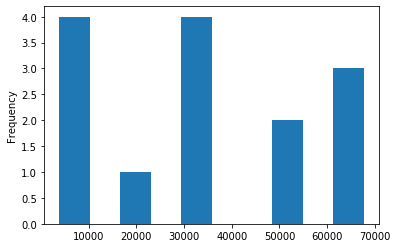

In [10]:
salary['Salary'].plot.hist()

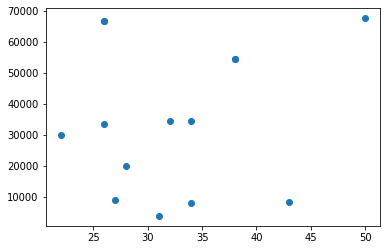

In [11]:
plt.scatter(x=salary['Age'],y=salary['Salary'])


In [12]:
# dframe=sal.copy()
# dframe['Age'].fillna(dframe['Age'].mean(),inplace=True)
# dframe['Salary'].fillna(dframe['Salary'].median(),inplace=True)

# dframe=dframe.groupby('Country')[['SNo','Name','Age','City','Country','Salary']].fillna(method='ffill').groupby('Country')[['SNo','Name','Age','City','Country','Salary']].fillna(method='bfill')
# dframe

In [13]:
#dropping 'SNo'and 'Name'column
new_salary=salary.drop(columns=['SNo','Name'])

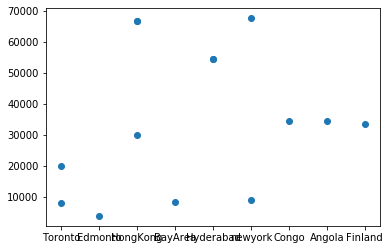

In [14]:

plt.scatter(new_salary['City'],y=new_salary['Salary'])

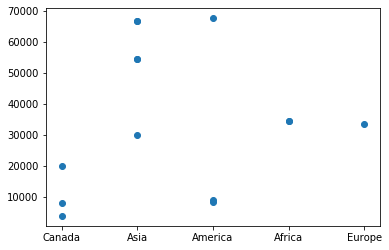

In [15]:

plt.scatter(new_salary['Country'],y=new_salary['Salary'])

In [53]:
n=new_salary.groupby('City').count()
n

,Age,Country,Salary
City,,,
Angola,1,1,1
BayArea,1,1,1
Congo,1,1,1
Edmonto,1,1,1
Finland,1,1,1
HongKong,3,3,3
Hyderabad,2,2,2
Toronto,2,2,2
newyork,2,2,2


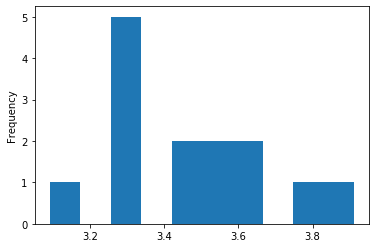

In [43]:
new_salary['Age'].plot.hist()

#it can be observed from the data that 'Age' is right skewed

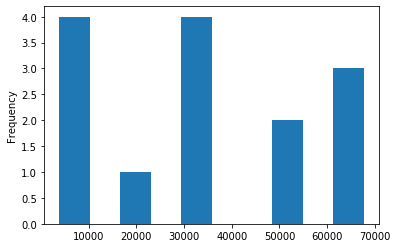

In [45]:
new_salary['Salary'].plot.hist()

In [16]:
#checking for skewness
new_salary.skew()


Age       0.905716
Salary    0.142454
dtype: float64

In [17]:
from scipy.stats import boxcox
new_salary['Age']=boxcox(new_salary['Age'],0)


In [18]:
new_salary.skew()

Age       0.434842
Salary    0.142454
dtype: float64

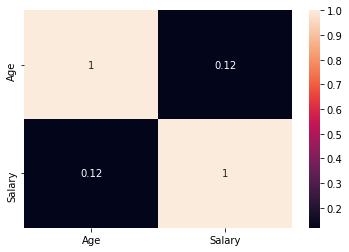

In [48]:
#checking the correlation
cor=new_salary.corr()
sns.heatmap(cor,annot=True)

In [19]:
x=new_salary[['Age']]
y=new_salary[['Salary']]

In [20]:
print(x.shape)
print(y.shape)

(14, 1)
(14, 1)


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.56956697],
       [-0.10402138],
       [ 0.31848651],
       [-0.90853067],
       [ 1.39262327],
       [ 0.82722331],
       [ 2.08247463],
       [-0.90853067],
       [-1.67262217],
       [ 0.82722331],
       [-0.73590955],
       [ 0.31848651],
       [ 0.04119452],
       [-0.90853067]])

In [313]:
# x=pd.get_dummies(data=x,drop_first=True)

In [24]:
#to find random state for which r2_score is maximum
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    #print("r2_score corresponding to random state:",r_state,"is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2_score corresponding to ",final_r_state,"is ",max_r_score)
    
    
    

max r2_score corresponding to  42 is  0.07363785770941511


In [25]:
#to do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5,scoring='r2').mean()

-4.883984639040428

In [27]:
#maximum r2_score is corresponding to 42,so using 42 as random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
print("r2_score is :",r2_score(y_test,y_pred))
print("root mean square error is:",np.sqrt(y_test,y_pred))

r2_score is : 0.06936253181790564
root mean square error is: [[233.80761322]
 [185.55861608]
 [141.42135624]]


In [35]:
#since r2_score is very low and the dataset has very few rows,boosting technique will be used
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
adpred=model.predict(x_test)
print("r2_score is:",r2_score(y_test,adpred))

0.7749533553008298
r2_score is: 0.5106259500535941


C:\Users\ramjm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
gd.fit(x_train,y_train)
print(gd.score(x_train,y_train))
gdpred=gd.predict(x_test)
print("r2_score is:",r2_score(y_test,gdpred))


0.8880288745821857
r2_score is: -0.3124571600276391


C:\Users\ramjm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#it is clear that AdaBoosting model is yielding better r2_score hence saving adaboost model
#saving the model using joblib
from sklearn.externals import joblib
joblib.dump(model,'AdaBoostfile.obj')

C:\Users\ramjm\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['AdaBoostfile.obj']

In [41]:
load_adaboost=joblib.load('AdaBoostfile.obj')
pred_joblib=load_adaboost.predict(x_test)
pred_joblib

array([54666., 21267.,  8888.])